In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate data
n_samples = 500

tt = np.random.uniform(-20, 10, n_samples)  # Temperature in Celsius
ff = np.random.uniform(0, 50, n_samples)  # Wind speed in km/h

# Wind Chill Formula
wc = 13.12 + 0.6215 * tt - 11.37 * (ff ** 0.16) + 0.3965 * tt * (ff ** 0.16)

# Convert to PyTorch tensors
x_train = torch.tensor(np.column_stack((tt, ff)), dtype=torch.float32)
y_train = torch.tensor(wc, dtype=torch.float32).view(-1, 1)

In [41]:
# Step 2: Build a Neural Network Model with Hidden Layers
class wind_chill_model(nn.Module):
    def __init__(self):
        super(wind_chill_model, self).__init__()
        self.fc1 = nn.Linear(2, 20)  # First hidden layer
        self.fc2 = nn.Linear(20, 20)  # Second hidden layer
        self.fc3 = nn.Linear(20, 1)  # Output layer
        self.relu = nn.ReLU()  # Activation function
    
    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after the first hidden layer
        x = self.relu(self.fc2(x))  # Apply ReLU after the second hidden layer
        x = self.fc3(x)  # Output layer (no activation for regression)
        return x

model = wind_chill_model()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)



In [42]:
# Training loop
train_loss = []  # Initialize loss list
n_epoch = 10000  # Set number of epochs

for epoch in range(n_epoch):
    model.train()  # Set model to train mode
    optimizer.zero_grad()  # Clear gradients
    y_pred = model(x_train)  # Forward pass
    loss = criterion(y_pred, y_train)  # Compute loss
    loss.backward()  # Backpropagate error
    optimizer.step()  # Update weights

    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{n_epoch}], Loss: {loss.item():.4f}')
    
    train_loss.append(loss.item())  # Save loss



Epoch [500/10000], Loss: 1.3382
Epoch [1000/10000], Loss: 0.8385
Epoch [1500/10000], Loss: 0.6018
Epoch [2000/10000], Loss: 0.4658
Epoch [2500/10000], Loss: 0.3813
Epoch [3000/10000], Loss: 0.3119
Epoch [3500/10000], Loss: 0.2030
Epoch [4000/10000], Loss: 0.0687
Epoch [4500/10000], Loss: 0.0241
Epoch [5000/10000], Loss: 0.0197
Epoch [5500/10000], Loss: 0.0172
Epoch [6000/10000], Loss: 0.0162
Epoch [6500/10000], Loss: 0.0150
Epoch [7000/10000], Loss: 0.0139
Epoch [7500/10000], Loss: 0.0139
Epoch [8000/10000], Loss: 0.0130
Epoch [8500/10000], Loss: 0.0124
Epoch [9000/10000], Loss: 0.0122
Epoch [9500/10000], Loss: 0.0120
Epoch [10000/10000], Loss: 0.0126


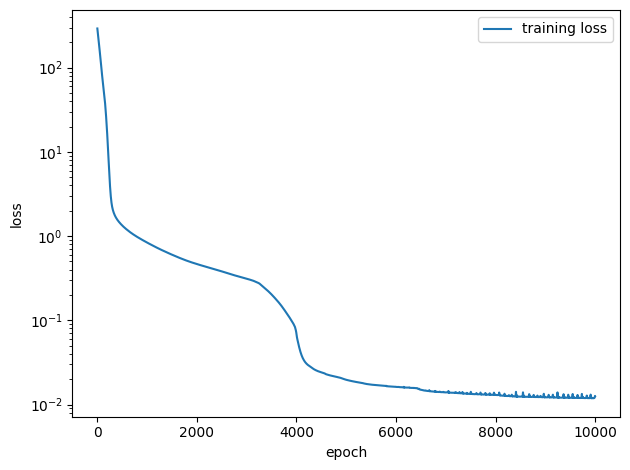

In [43]:
plt.plot(np.arange(n_epoch),train_loss,label="training loss")
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.tight_layout()



In [ ]:
# Create a validation data set
n_vsamples=100

vtt = np.random.uniform(-20, 10, n_vsamples)  # Temperature in Celsius
vff = np.random.uniform(0, 50, n_vsamples)  # Wind speed in km/h
vwc = 13.12 + 0.6215 * vtt - 11.37 * (vff ** 0.16) + 0.3965 * vtt * (vff ** 0.16)

x_val = torch.tensor(np.column_stack((vtt, vff)), dtype=torch.float32)
y_val = torch.tensor(vwc, dtype=torch.float32).view(-1, 1)

# Make the predictions with the model
y_pred=model(x_val)

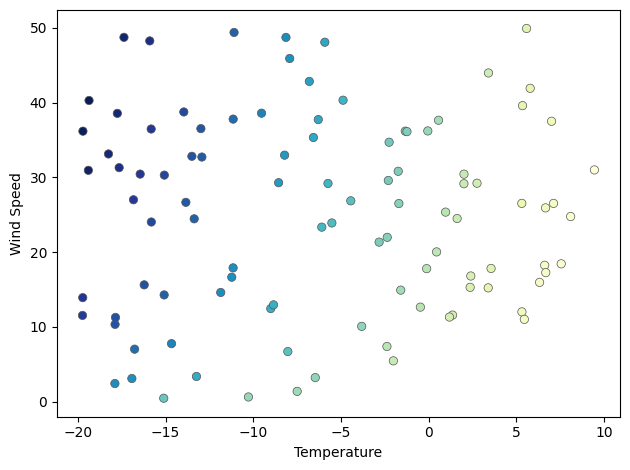

In [ ]:
# Create a scatter plot for the wind chill estimates
plt.scatter(vtt,vff,c=y_pred.detach().numpy(),cmap="YlGnBu_r",edgecolor="#555555",linewidth=0.5)
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.tight_layout()



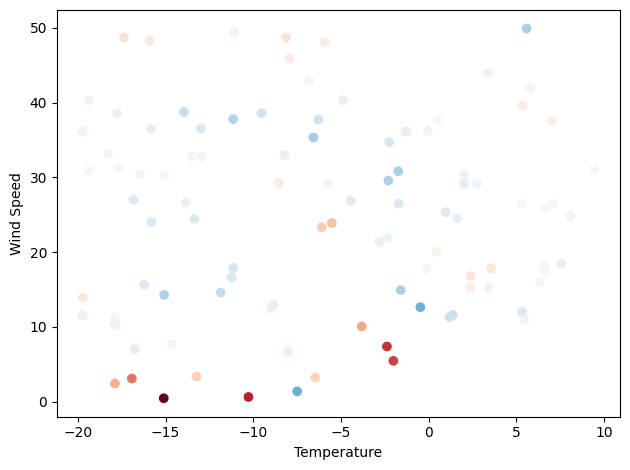

In [52]:
plt.scatter(vtt,vff,c=(y_pred-y_val).detach().numpy(),vmin=-0.5,vmax=0.5,cmap="RdBu_r")
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.tight_layout()

In [73]:
# Step 2: Build a Neural Network Model with Hidden Layers
class wind_chill_model(nn.Module):
    def __init__(self):
        super(wind_chill_model, self).__init__()
        self.fc1 = nn.Linear(2, 50)  # First hidden layer
        self.fc2 = nn.Linear(50, 50)  # Second hidden layer
        self.fc3 = nn.Linear(50, 1)  # Output layer
        self.relu = nn.ReLU()  # Activation function
    
    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after the first hidden layer
        x = self.relu(self.fc2(x))  # Apply ReLU after the second hidden layer
        x = self.fc3(x)  # Output layer (no activation for regression)
        return x

model_50 = wind_chill_model()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_50.parameters(), lr=0.00025)



In [74]:
train_loss=[]
validation_loss=[]

# Training loop
n_epoch=20000
for epoch in range(n_epoch):
    model_50.train()
    optimizer.zero_grad()
    y_pred=model_50(x_train)
    loss=criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1)%500==0:
        print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}')
    train_loss.append(loss.item())
    y_pred=model_50(x_val)
    vloss=criterion(y_pred,y_val)
    validation_loss.append(vloss.item())



Epoch [500/20000], Loss: 1.3586
Epoch [1000/20000], Loss: 0.7397
Epoch [1500/20000], Loss: 0.5076
Epoch [2000/20000], Loss: 0.3357
Epoch [2500/20000], Loss: 0.1899
Epoch [3000/20000], Loss: 0.1051
Epoch [3500/20000], Loss: 0.0691
Epoch [4000/20000], Loss: 0.0524
Epoch [4500/20000], Loss: 0.0381
Epoch [5000/20000], Loss: 0.0215
Epoch [5500/20000], Loss: 0.0158
Epoch [6000/20000], Loss: 0.0131
Epoch [6500/20000], Loss: 0.0116
Epoch [7000/20000], Loss: 0.0103
Epoch [7500/20000], Loss: 0.0090
Epoch [8000/20000], Loss: 0.0078
Epoch [8500/20000], Loss: 0.0067
Epoch [9000/20000], Loss: 0.0058
Epoch [9500/20000], Loss: 0.0051
Epoch [10000/20000], Loss: 0.0045
Epoch [10500/20000], Loss: 0.0040
Epoch [11000/20000], Loss: 0.0045
Epoch [11500/20000], Loss: 0.0032
Epoch [12000/20000], Loss: 0.0030
Epoch [12500/20000], Loss: 0.0028
Epoch [13000/20000], Loss: 0.0025
Epoch [13500/20000], Loss: 0.0024
Epoch [14000/20000], Loss: 0.0022
Epoch [14500/20000], Loss: 0.0035
Epoch [15000/20000], Loss: 0.0019


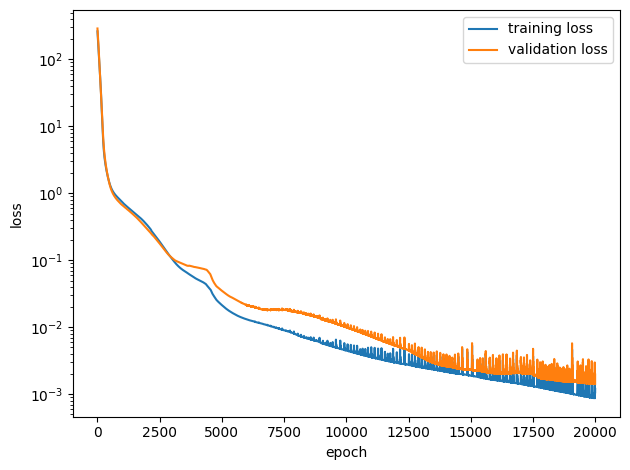

In [75]:
# Loss curve 
plt.plot(np.arange(n_epoch),train_loss,label="training loss")
plt.plot(np.arange(n_epoch),validation_loss,label="validation loss")
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.tight_layout()



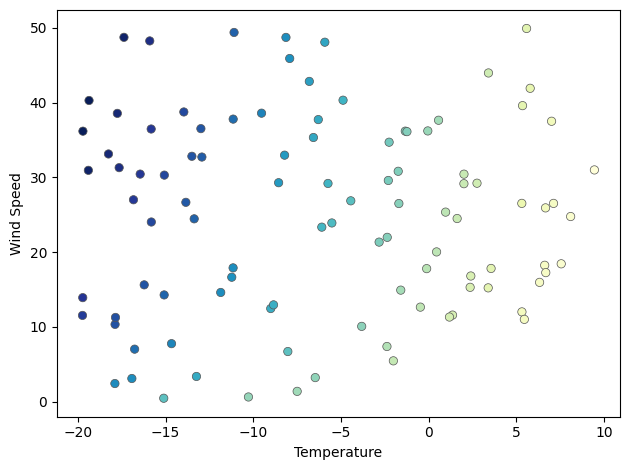

In [76]:
# Make the predictions with the model
y_pred=model_50(x_val)

# Create a scatter plot for the wind chill estimates
plt.scatter(vtt,vff,c=y_pred.detach().numpy(),cmap="YlGnBu_r",edgecolor="#555555",linewidth=0.5)
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.tight_layout()

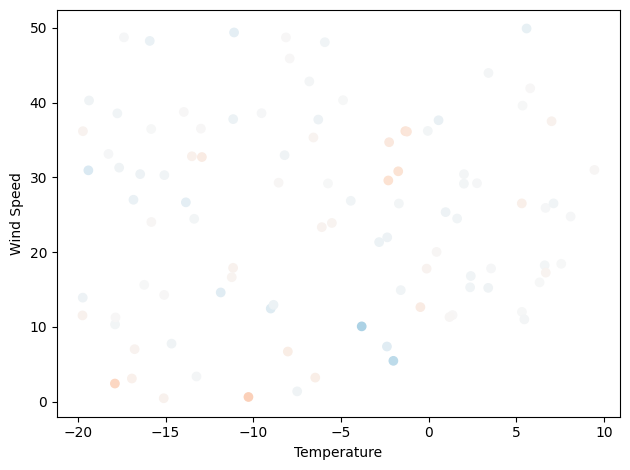

In [77]:
plt.scatter(vtt,vff,c=(y_pred-y_val).detach().numpy(),vmin=-0.5,vmax=0.5,cmap="RdBu_r")
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.tight_layout()